In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#!unzip "drive/MyDrive/dog-folder/dog-breed-identification.zip" -d "drive/MyDrive/dog-folder/"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

#Check for GPU availability
print("GPU", "available(YESSS!!!)" if tf.config.list_physical_devices("GPU") else "not available")

Tensorflow version:  2.14.0
TF Hub version:  0.15.0
GPU not available


In [ ]:
#with open("drive/MyDrive/dogfolder/labels.csv") as f:
#  print(f.readlines())

In [ ]:
import pandas as pd
labels = pd.read_csv("drive/MyDrive/dogfolder/labels.csv")
print(labels.describe())
print(labels.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels.breed.unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [ ]:
len(labels)

10222

In [ ]:
labels.breed.value_counts().to_frame()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
...                     ...
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66

[120 rows x 1 columns]

<Axes: >

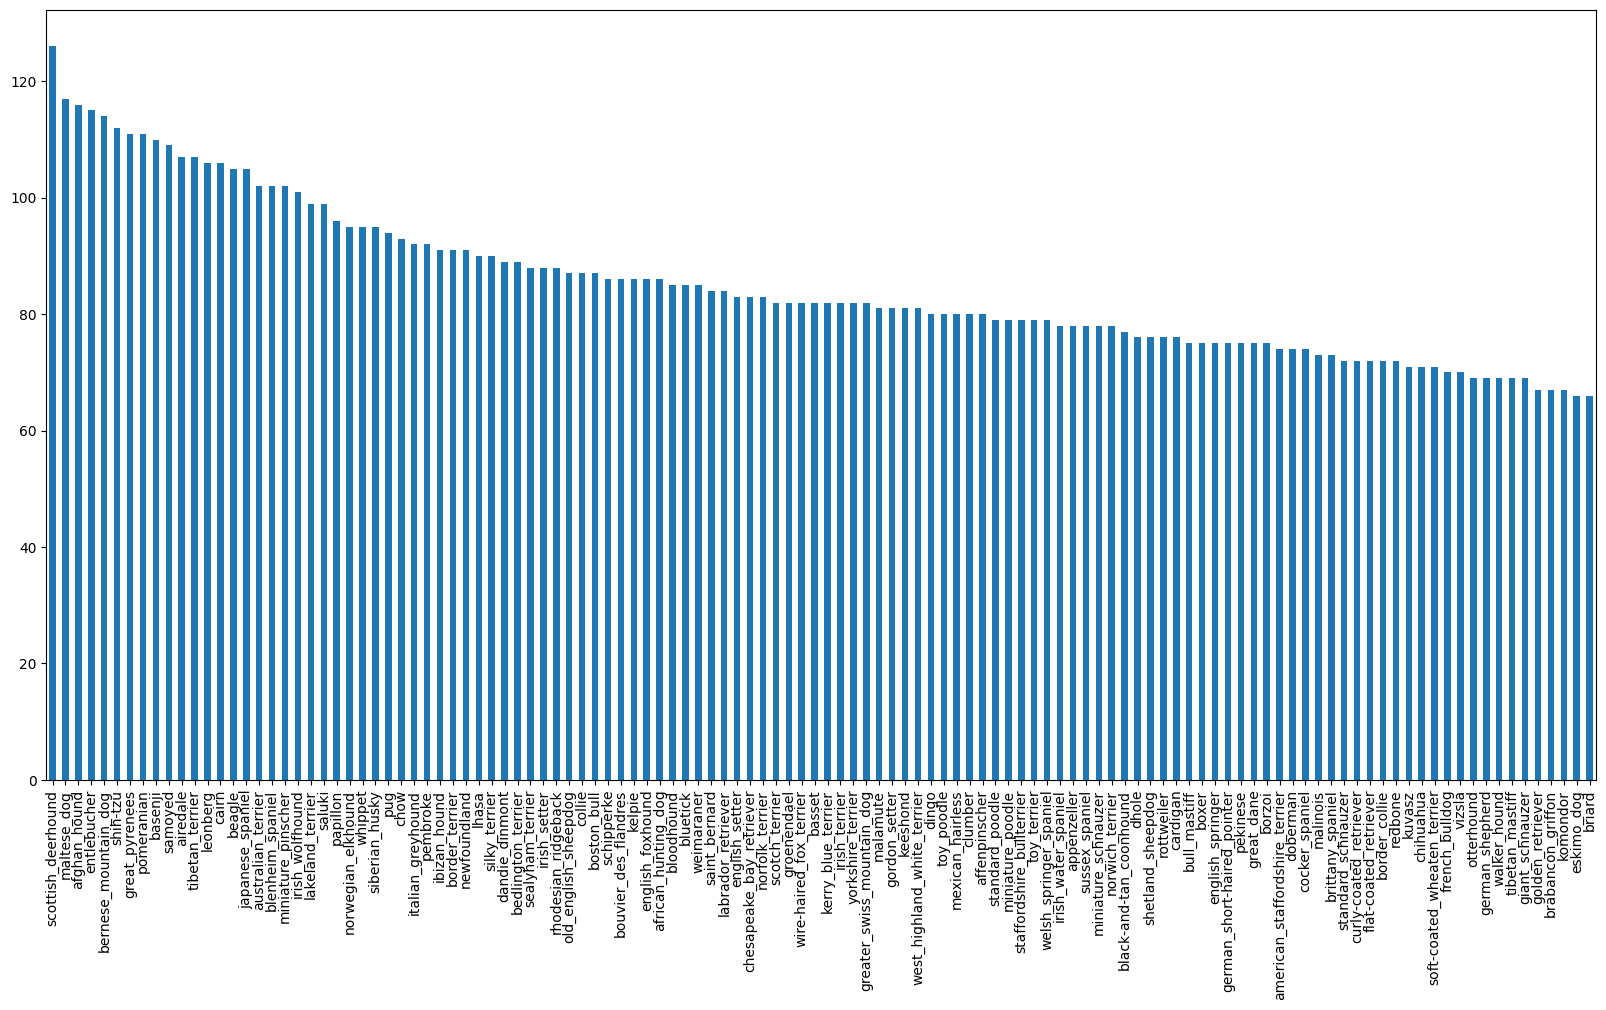

In [ ]:
labels['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels['breed'].value_counts().median()

82.0

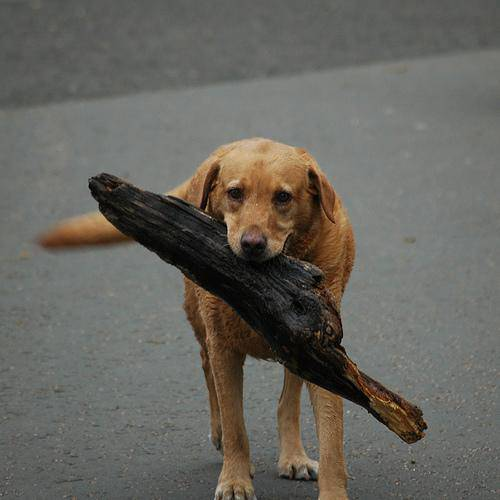

In [ ]:
from IPython.display import Image
Image('drive/MyDrive/dogfolder/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

In [ ]:
labels.head(10)

id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

In [ ]:
filename = "drive/MyDrive/dogfolder/train/" + labels['id'] + ".jpg"
filename[:10]

0    drive/MyDrive/dogfolder/train/000bec180eb18c76...
1    drive/MyDrive/dogfolder/train/001513dfcb2ffafc...
2    drive/MyDrive/dogfolder/train/001cdf01b096e06d...
3    drive/MyDrive/dogfolder/train/00214f311d5d2247...
4    drive/MyDrive/dogfolder/train/0021f9ceb3235eff...
5    drive/MyDrive/dogfolder/train/002211c81b498ef8...
6    drive/MyDrive/dogfolder/train/00290d3e1fdd2722...
7    drive/MyDrive/dogfolder/train/002a283a315af96e...
8    drive/MyDrive/dogfolder/train/003df8b8a8b05244...
9    drive/MyDrive/dogfolder/train/0042188c895a2f14...
Name: id, dtype: object

In [ ]:
filename = filename[1:]

In [ ]:
filename

1        drive/MyDrive/dogfolder/train/001513dfcb2ffafc...
2        drive/MyDrive/dogfolder/train/001cdf01b096e06d...
3        drive/MyDrive/dogfolder/train/00214f311d5d2247...
4        drive/MyDrive/dogfolder/train/0021f9ceb3235eff...
5        drive/MyDrive/dogfolder/train/002211c81b498ef8...
                               ...                        
10217    drive/MyDrive/dogfolder/train/ffd25009d635cfd1...
10218    drive/MyDrive/dogfolder/train/ffd3f636f7f379c5...
10219    drive/MyDrive/dogfolder/train/ffe2ca6c940cddfe...
10220    drive/MyDrive/dogfolder/train/ffe5f6d8e2bff356...
10221    drive/MyDrive/dogfolder/train/fff43b07992508bc...
Name: id, Length: 10221, dtype: object

In [ ]:
type(filename)

pandas.core.series.Series

In [ ]:
len(filename)

10221

In [ ]:
labels['id'][1:]

1        001513dfcb2ffafc82cccf4d8bbaba97
2        001cdf01b096e06d78e9e5112d419397
3        00214f311d5d2247d5dfe4fe24b2303d
4        0021f9ceb3235effd7fcde7f7538ed62
5        002211c81b498ef88e1b40b9abf84e1d
                       ...               
10217    ffd25009d635cfd16e793503ac5edef0
10218    ffd3f636f7f379c51ba3648a9ff8254f
10219    ffe2ca6c940cddfee68fa3cc6c63213f
10220    ffe5f6d8e2bff356e9482a80a6e29aac
10221    fff43b07992508bc822f33d8ffd902ae
Name: id, Length: 10221, dtype: object

In [ ]:
filename2 = 'drive/MyDrive/dogfolder/train/' + labels['id'][1:] + '.jpg'

In [ ]:
filename2

1        drive/MyDrive/dogfolder/train/001513dfcb2ffafc...
2        drive/MyDrive/dogfolder/train/001cdf01b096e06d...
3        drive/MyDrive/dogfolder/train/00214f311d5d2247...
4        drive/MyDrive/dogfolder/train/0021f9ceb3235eff...
5        drive/MyDrive/dogfolder/train/002211c81b498ef8...
                               ...                        
10217    drive/MyDrive/dogfolder/train/ffd25009d635cfd1...
10218    drive/MyDrive/dogfolder/train/ffd3f636f7f379c5...
10219    drive/MyDrive/dogfolder/train/ffe2ca6c940cddfe...
10220    drive/MyDrive/dogfolder/train/ffe5f6d8e2bff356...
10221    drive/MyDrive/dogfolder/train/fff43b07992508bc...
Name: id, Length: 10221, dtype: object

In [ ]:
#labels_id = labels["id"]+".jpg"

In [ ]:
#labels[labels["id"]=="000bec180eb18c7604dcecc8fe0dba07.jpg"]

In [ ]:
#labels.drop(["000bec180eb18c7604dcecc8fe0dba07.jpg"],axis=0)

In [ ]:
#set(labels_id) - set(os.listdir("drive/MyDrive/dog-folder/train/"))

In [ ]:
#set(os.listdir("drive/MyDrive/dog-folder/train/")) - set(labels_id)

In [ ]:
#os.listdir("drive/MyDrive/dog-folder/train/")

In [ ]:
os.listdir('drive/MyDrive/')

['Colab Notebooks',
 'dogfolder',
 '.ipynb_checkpoints',
 'Resume-Kartik.pdf',
 'hello']

In [ ]:
import os
len(os.listdir("drive/MyDrive/dogfolder/train/"))

10221

In [ ]:
import numpy as np
new_label = labels.iloc[1:,:]
labels_breed = new_label["breed"]
labels_breed = np.array(labels_breed)

# labels_breed = labels[1:]
# labels_breed = np.array(labels_breed)

In [ ]:
len(labels_breed)

10221

In [ ]:
new_label = labels.iloc[1:,:]
new_label

id                     breed
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
5      002211c81b498ef88e1b40b9abf84e1d        bedlington_terrier
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10221 rows x 2 columns]

In [ ]:
labels_breed

array(['dingo', 'pekinese', 'bluetick', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels_breed)

10221

In [ ]:
unique_breed = np.unique(labels_breed)

In [ ]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
bool_label =[]
for label in labels_breed:
   bool_label.append([label  == unique_breed])

In [ ]:
len(bool_label)

10221

In [ ]:
bool_label

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
boolean_labels = [labels_b == unique_breed for labels_b in labels_breed]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels[1])

120

In [ ]:
X = filename
y = boolean_labels

In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

3000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

Preprocessing Images (Converting images into tensors)

To preprocess
1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable, image
3. Turn our image (a jpg) into tensors
4. Resize the image to be a shape of (192,192)
5. Return the modified image

In [ ]:
from matplotlib.pyplot import imread
image = imread(filename[31])
image.shape

(500, 375, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[ 85, 122,  42],
        [ 86, 123,  43],
        [ 86, 123,  43],
        ...,
        [ 92, 146,  84],
        [ 92, 146,  84],
        [ 91, 145,  83]],

       [[ 86, 123,  43],
        [ 86, 123,  43],
        [ 87, 124,  44],
        ...,
        [ 92, 146,  84],
        [ 92, 146,  84],
        [ 91, 145,  83]]], dtype=uint8)>

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
tf.constant(imread(X_train))

AttributeError: ignored

In [ ]:
imag = tf.io.read_file(filename[21])
tf.image.decode_jpeg(imag, channels =3)

<tf.Tensor: shape=(320, 390, 3), dtype=uint8, numpy=
array([[[ 83,  99,  88],
        [ 85, 101,  90],
        [ 85, 101,  90],
        ...,
        [ 40,  39,  44],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       [[ 78,  94,  83],
        [ 81,  97,  86],
        [ 82,  98,  87],
        ...,
        [ 40,  39,  44],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       [[ 71,  87,  76],
        [ 74,  90,  79],
        [ 77,  93,  82],
        ...,
        [ 40,  39,  44],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       ...,

       [[ 29,  80,  49],
        [ 37,  88,  57],
        [ 47,  98,  67],
        ...,
        [116, 168, 120],
        [117, 166, 119],
        [108, 160, 112]],

       [[ 39,  90,  59],
        [ 43,  94,  63],
        [ 48,  99,  68],
        ...,
        [115, 169, 119],
        [118, 170, 121],
        [110, 164, 114]],

       [[ 50, 101,  70],
        [ 49, 100,  69],
        [ 46,  97,  66],
        ...,
        [117, 171, 12

In [ ]:
IMG_SIZE =192

def process_image(image_path, img_size=IMG_SIZE):

  #Read the image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg into numerical Tensor with 3 colour channel(Red, Green, Blue[RGB])
  image = tf.image.decode_jpeg(image, channels=3)
  #Normalize the value from [0,255] to [0,1]
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image in 224,224
  image = tf.image.resize(image, size=[img_size,img_size])

  return image


Turn our data into Batches

In [ ]:
#We need our data in Tensor tuple form
def get_image_labels(image_path, label):
  image = process_image(image_path)
  return image,label

In [ ]:
 (tf.data.Dataset.from_tensor_slices(tf.constant(X_train))).map(process_image).batch(32)

<_BatchDataset element_spec=TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None)>

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):


  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating valid data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_image_labels).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating train data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_labels)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
#Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating train data batches
Creating valid data batches


In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
# how to check data of this --   tf.Size(val_data)

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis("off")

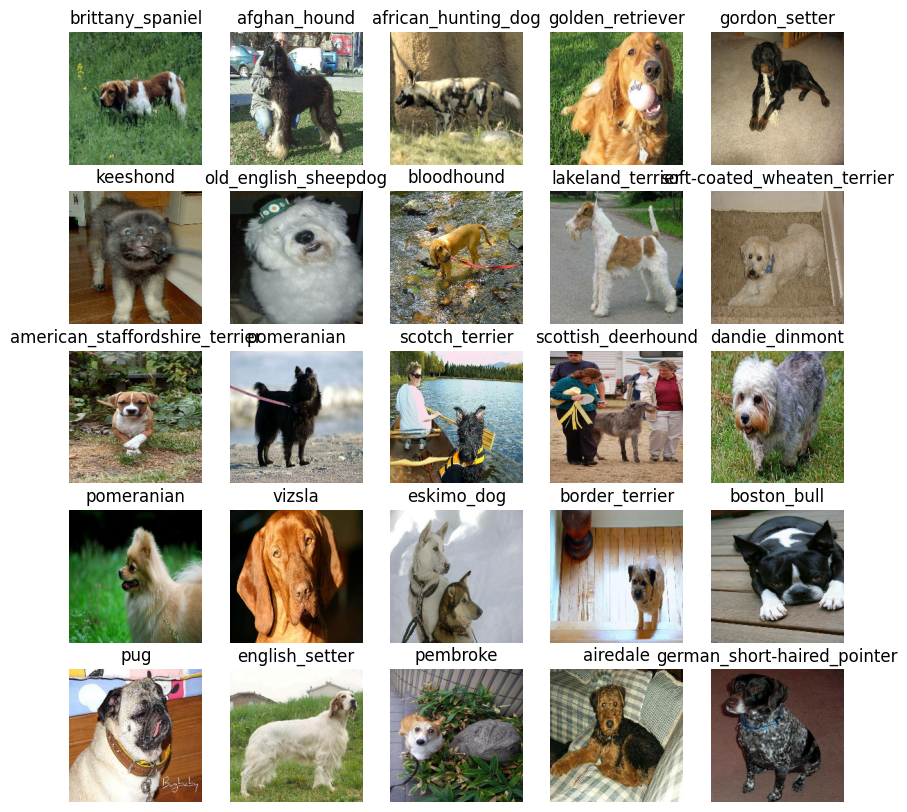

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

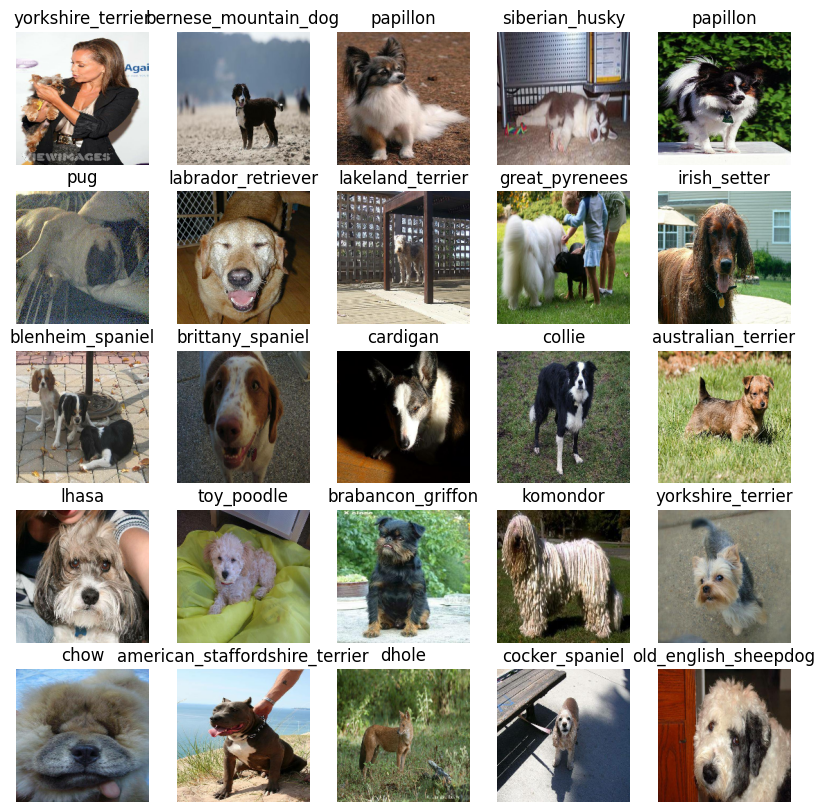

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

Importing model from tensorflow hub

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breed)

#Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_035_192/classification/5"

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  model = tf.keras.Sequential([
     hub.KerasLayer(MODEL_URL),tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")]) #Layer 2 (output layer)

  # Compile the Mode
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_035_192/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 1812729 (6.92 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/dogfolder/logs/fit/",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#Create earlystopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
print("GPU", "Available, Yes!!!!" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


Create a function which trains a model.

*Create a model using `create_model()`
*Setup a tensorBoard callback using `create_tensorboard_callback()`
*Call the fit() function on our model passing it the trainig data, validation data, number of epochs to train for (`NUM_EPOCHS`) and callback which we like to use
*Return the model

In [ ]:
def train_model():
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_035_192/classification/5
Epoch 1/100
25/25 [==============================] - 224s 9s/step - loss: 5.2364 - accuracy: 0.0550 - val_loss: 4.0457 - val_accuracy: 0.1400
Epoch 2/100
25/25 [==============================] - 11s 438ms/step - loss: 2.0182 - accuracy: 0.5125 - val_loss: 3.2427 - val_accuracy: 0.2450
Epoch 3/100
25/25 [==============================] - 13s 506ms/step - loss: 0.8422 - accuracy: 0.8375 - val_loss: 3.0191 - val_accuracy: 0.2450
Epoch 4/100
25/25 [==============================] - 13s 521ms/step - loss: 0.3888 - accuracy: 0.9725 - val_loss: 2.9854 - val_accuracy: 0.2800
Epoch 5/100
25/25 [==============================] - 13s 509ms/step - loss: 0.2132 - accuracy: 0.9962 - val_loss: 2.9769 - val_accuracy: 0.2700
Epoch 6/100
25/25 [==============================] - 10s 413ms/step - loss: 0.1333 - accuracy: 1.0000 - val_loss: 2.9464 - val_accuracy: 0.2800
Epoch 7/100
25/25 [==========================

In [ ]:
NUM_EPOCHS

100

In [ ]:
# %tensorboard --logdir drive/MyDrive/dogfolder/logs

Making and evaluting model predicition from model url which we have set above in our data

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#Make prediciton on validation data
predictions = model.predict(val_data, verbose=1) # verbose is like when you are making prediction show me your progress
predictions

7/7 [==============================] - 3s 265ms/step


array([[1.6295161e-02, 5.9283996e-01, 7.7935809e-05, ..., 1.1140083e-04,
        2.3202710e-02, 3.1484950e-02],
       [5.7087136e-03, 6.8990730e-02, 5.2872207e-03, ..., 2.2455466e-03,
        4.4378838e-05, 6.7729852e-04],
       [1.8569141e-03, 7.0980648e-05, 2.0233670e-03, ..., 3.9121203e-04,
        1.0570207e-04, 1.4519102e-04],
       ...,
       [6.8028215e-03, 3.4753623e-04, 1.2124232e-04, ..., 4.9850869e-04,
        1.1601335e-03, 2.0789038e-02],
       [8.7617300e-03, 8.4953394e-04, 5.9741484e-07, ..., 1.5216806e-07,
        5.3204974e-04, 3.7812322e-01],
       [2.9803587e-06, 2.7841926e-02, 4.0091974e-05, ..., 4.1826154e-04,
        2.0439071e-05, 1.7430414e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[3])

1.0

In [ ]:
#First Predictions
index=99
print(f"For val_data index {index}")
print(f"Max value (probability of prediction) : {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breed[np.argmax(predictions[index])]}")

For val_data index 99
Max value (probability of prediction) : 0.940874457359314
Sum : 1.0
Max index: 101
Predicted label: siberian_husky


In [ ]:
def get_pred_label(predictions_probability):

  return unique_breed[np.argmax(predictions_probability)]

pred_label = get_pred_label(predictions[89])
pred_label

'staffordshire_bullterrier'

In [ ]:
#Create a function to unbatch a batch dataset

In [ ]:
def unbatchify(data):
  images_ =[]
  labels_ = []

  #Loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():

    images_.append(image)
    labels_.append(unique_breed[np.argmax(label)])  #
  return images_,labels_

val_images, val_labels = unbatchify(val_data)

In [ ]:
print(val_images[22])

[[[0.20655298 0.2542654  0.08563793]
  [0.17002656 0.23179127 0.0768893 ]
  [0.157067   0.24236113 0.06229575]
  ...
  [0.6560067  0.66479254 0.51882666]
  [0.43421164 0.4655842  0.27863565]
  [0.49943268 0.5388356  0.33043078]]

 [[0.21366423 0.2697917  0.10360499]
  [0.19534315 0.25710788 0.10735295]
  [0.18227126 0.26016137 0.08343547]
  ...
  [0.5518502  0.563247   0.398337  ]
  [0.40526965 0.4366422  0.25165442]
  [0.4576785  0.49582198 0.30138728]]

 [[0.20359479 0.27026147 0.10228759]
  [0.20490198 0.2676471  0.12254903]
  [0.21105325 0.28164148 0.12065973]
  ...
  [0.47257686 0.48905608 0.29321247]
  [0.40711808 0.43849063 0.24633376]
  [0.48822388 0.52351797 0.33920425]]

 ...

 [[0.32738936 0.31426984 0.18575974]
  [0.39286524 0.41500545 0.20365949]
  [0.41659135 0.4511088  0.30921453]
  ...
  [0.14696021 0.18580157 0.14678311]
  [0.25459632 0.24758075 0.17363258]
  [0.38168514 0.2749903  0.16154408]]

 [[0.35584152 0.34053314 0.22977942]
  [0.48743877 0.5200981  0.32567403]


In [ ]:
print(predictions[22])

[1.59662468e-05 4.95340146e-06 4.98229451e-03 3.11794435e-03
 5.64889997e-05 5.05652997e-06 3.03225206e-05 1.78688642e-04
 1.19460114e-04 3.18489678e-04 5.27978518e-05 3.72956447e-06
 1.66065058e-06 7.83767700e-06 2.26138378e-04 2.21091454e-04
 5.11367434e-05 9.75419860e-03 1.61653952e-05 2.52490258e-06
 2.08166559e-04 6.80583662e-06 3.89505411e-04 1.19210425e-04
 1.27752224e-04 2.99910953e-05 2.24752701e-03 1.01444009e-03
 1.79542825e-02 4.23684651e-05 1.79351569e-04 1.72247874e-05
 6.04856541e-05 2.35578882e-05 1.74619912e-04 4.67297541e-05
 8.50485146e-01 1.24848085e-02 3.95515099e-06 1.64903380e-04
 2.58050932e-05 4.96066241e-06 5.32107260e-05 6.72623219e-06
 3.15703001e-05 2.94656202e-05 2.17734123e-04 1.88564684e-03
 4.29921693e-06 4.87020880e-05 3.00384982e-05 2.05483593e-05
 5.70003613e-06 3.26094341e-05 2.39725690e-02 3.42634689e-06
 2.45727692e-03 7.43314717e-03 2.18778197e-03 1.24509376e-03
 1.08203632e-04 2.77415402e-05 1.06505831e-05 4.47524711e-03
 3.96477943e-03 2.279982

In [ ]:
# get_pred_label(val_images[39]) later check

In [ ]:
get_pred_label(predictions[99])

'siberian_husky'

Create function to compare for predictions and ground truth

In [ ]:
def plot_pred(predictions_probability,labels, image, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = predictions_probability[n], labels[n], image[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:.2f}% {}" .format(pred_label,
                                     np.max(pred_prob)*100,
                                      true_label),color=color)


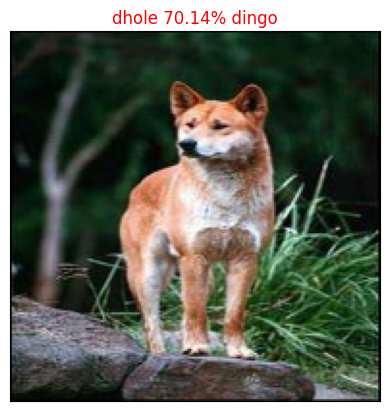

In [ ]:
plot_pred(predictions_probability=predictions,
          labels=val_labels,
          image=val_images, n=54)

Making Prediction on top 10 data labels

In [ ]:
def plot_pred_conf(predictions_probability, labels,n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = predictions_probability[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediciton confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  #Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values*100,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation='vertical')

  #Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

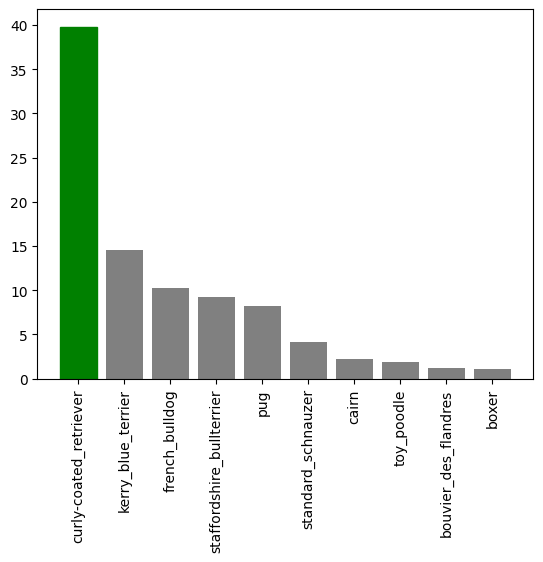

In [ ]:
plot_pred_conf(predictions_probability=predictions, labels=val_labels, n=65)

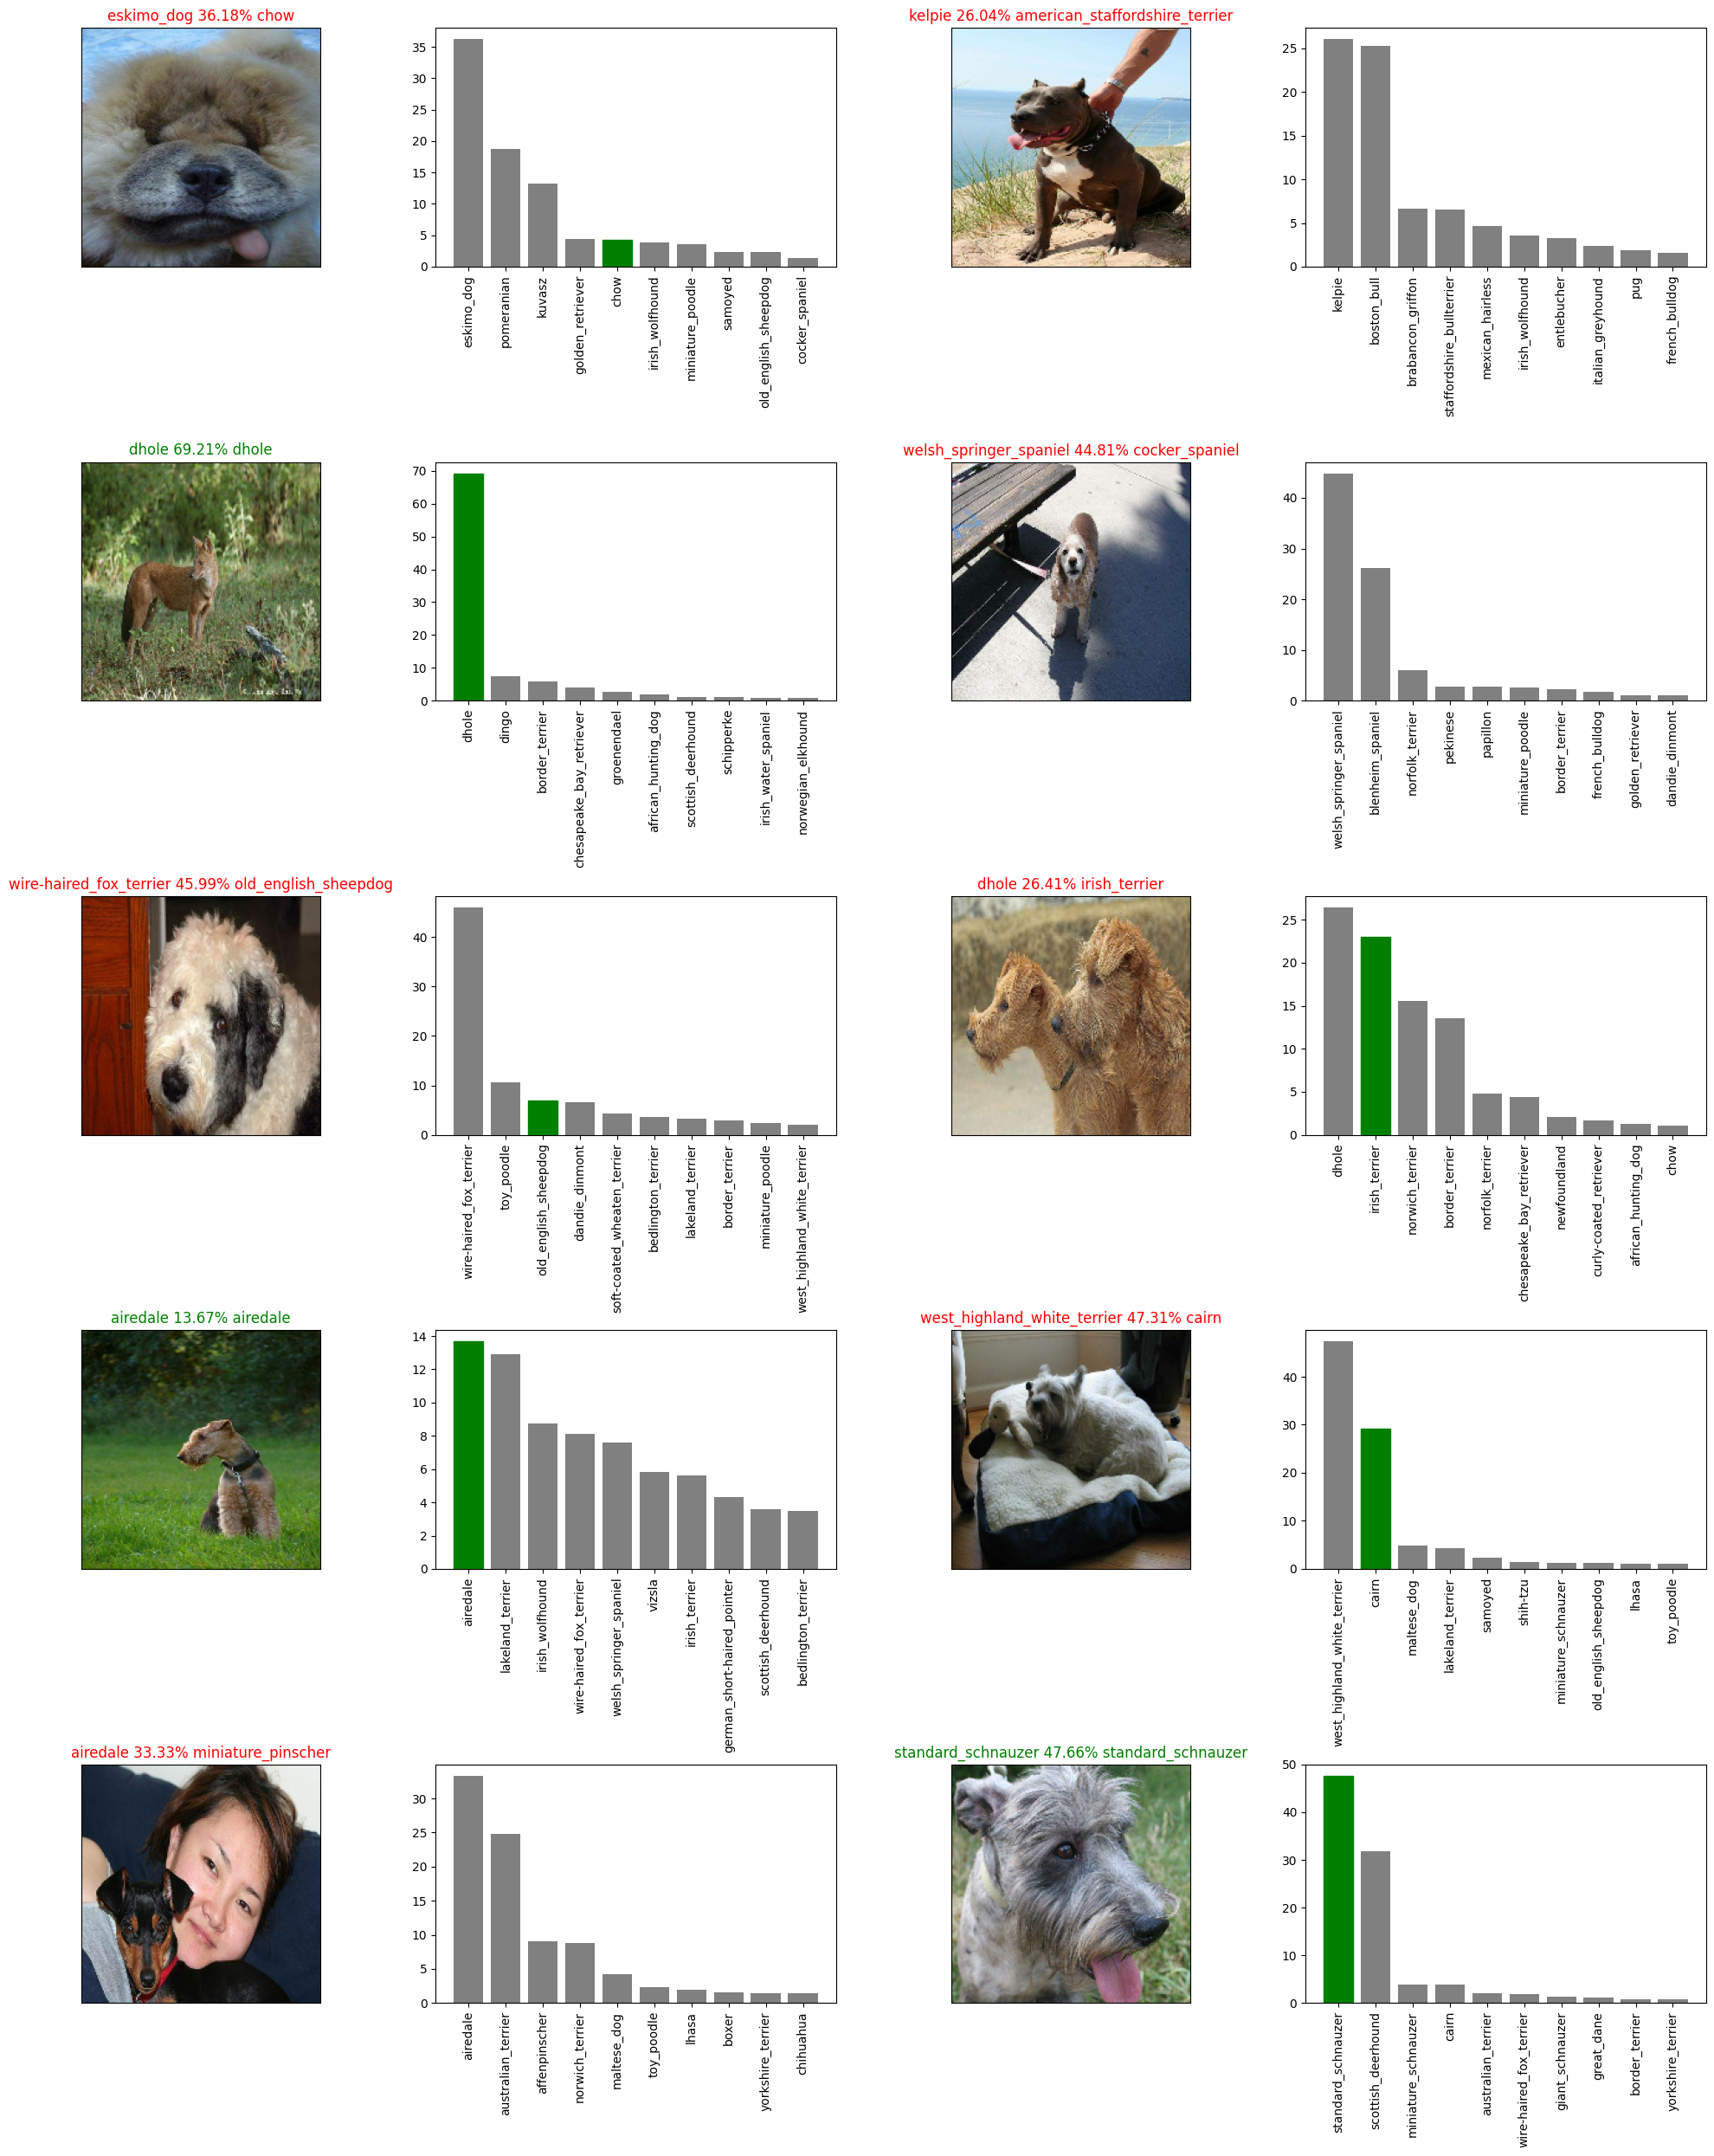

In [ ]:
# Let's check out a few predictions and their different values

i_multiplier = 20
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions_probability=predictions,
            labels=val_labels,
            image=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions_probability=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

Saving a Model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in models directory and appends a suffix(string)
  """
  #Create models directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/dogfolder/model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"  #save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """

  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
 # Save model trained on 1000 images
 save_model(model, suffix="1000-images-mobilenetvet2-Adam")

Saving model to: drive/MyDrive/dogfolder/model/20231104-12181699100315-1000-images-mobilenetvet2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/dogfolder/model/20231104-12181699100315-1000-images-mobilenetvet2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model("drive/MyDrive/dogfolder/model/20231104-12181699100315-1000-images-mobilenetvet2-Adam.h5")

Loading saved model from: drive/MyDrive/dogfolder/model/20231104-12181699100315-1000-images-mobilenetvet2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 162ms/step - loss: 3.0450 - accuracy: 0.3300


[3.0450191497802734, 0.33000001311302185]

In [ ]:
#Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 100ms/step - loss: 3.0450 - accuracy: 0.3300


[3.0450191497802734, 0.33000001311302185]

Training a big dog model (on the full data)

In [ ]:
len(X), len(y)

(10221, 10221)

In [ ]:
# Create a data batch with the full data
full_data = create_data_batches(X,y)

Creating train data batches


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_035_192/classification/5


In [ ]:
full_model_tensorboard = create_tensorboard_callback()

In [ ]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [ ]:
# Fit the full model
full_model.fit(x=full_data, epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 33s 91ms/step - loss: 2.3632 - accuracy: 0.4175
Epoch 2/100
320/320 [==============================] - 27s 84ms/step - loss: 1.1895 - accuracy: 0.6609
Epoch 3/100
320/320 [==============================] - 28s 88ms/step - loss: 0.8949 - accuracy: 0.7331
Epoch 4/100
320/320 [==============================] - 27s 83ms/step - loss: 0.7014 - accuracy: 0.7920
Epoch 5/100
320/320 [==============================] - 28s 88ms/step - loss: 0.5580 - accuracy: 0.8344
Epoch 6/100
320/320 [==============================] - 27s 84ms/step - loss: 0.4519 - accuracy: 0.8692
Epoch 7/100
320/320 [==============================] - 27s 85ms/step - loss: 0.3647 - accuracy: 0.9006
Epoch 8/100
320/320 [==============================] - 27s 84ms/step - loss: 0.2978 - accuracy: 0.9221
Epoch 9/100
320/320 [==============================] - 29s 90ms/step - loss: 0.2417 - accuracy: 0.9420
Epoch 10/100
320/320 [==============================] - 27s 85ms/step - l

In [ ]:
save_model(full_model, suffix='full-image-mobilenetv2-Adam')

Saving model to: drive/MyDrive/dogfolder/model/20231104-13491699105751-full-image-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/dogfolder/model/20231104-13491699105751-full-image-mobilenetv2-Adam.h5'

In [ ]:
loading_full_model = load_model('drive/MyDrive/dogfolder/model/20231104-13491699105751-full-image-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/dogfolder/model/20231104-13491699105751-full-image-mobilenetv2-Adam.h5


In [ ]:
# Making prediction on test dataset
test_path = "drive/MyDrive/dogfolder/test/"
test_filename = [test_path + fname for fname in os.listdir(test_path)]
test_filename[:10]

['drive/MyDrive/dogfolder/test/e0f2620cb1ebf648b986c8a09dbd3664.jpg',
 'drive/MyDrive/dogfolder/test/e411a1b3681604f6321af7cb8e8f2de7.jpg',
 'drive/MyDrive/dogfolder/test/e2166bdff9e35f80aa7984ec64c8cce8.jpg',
 'drive/MyDrive/dogfolder/test/e699b20911a55abda3558c5bcd37443d.jpg',
 'drive/MyDrive/dogfolder/test/e732916519751eaa0cb2ba0cc1217ab9.jpg',
 'drive/MyDrive/dogfolder/test/dd5c5652d5d34e922af98c9b0295d909.jpg',
 'drive/MyDrive/dogfolder/test/e55d2fced9eb7e46aef5bdb288145fa4.jpg',
 'drive/MyDrive/dogfolder/test/e743bea73da2c0dab99ccdbc697b1ac8.jpg',
 'drive/MyDrive/dogfolder/test/e1e7949f64ff3283a5dafa9d39199193.jpg',
 'drive/MyDrive/dogfolder/test/e4a8dfc6e219b20a0cbced41eaf6a435.jpg']

In [ ]:
len(test_filename)

10357

In [ ]:
test_data = create_data_batches(test_filename,test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions = loading_full_model.predict(test_data, verbose=1)

  6/324 [..............................] - ETA: 2:24

KeyboardInterrupt: ignored

In [ ]:
# Save prediction
np.savetxt("drive/MyDrive/dogfolder/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
# Load Predictions
test_predictions = np.loadtxt("drive/MyDrive/dogfolder/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[2.53907301e-13, 2.45196848e-16, 2.69380427e-15, ...,
        5.61538371e-09, 1.11620220e-13, 4.95629005e-15],
       [5.80030364e-11, 5.34291601e-16, 6.20350559e-13, ...,
        8.43074000e-10, 1.46712796e-06, 1.72809916e-06],
       [4.20948812e-14, 8.25416137e-17, 1.10185434e-20, ...,
        3.17986742e-20, 2.89832753e-14, 1.26025668e-13],
       ...,
       [6.33741703e-13, 1.70299625e-11, 1.25129239e-11, ...,
        2.46328938e-07, 8.09704392e-09, 3.34824535e-13],
       [6.71538156e-14, 3.14502868e-11, 3.46533256e-17, ...,
        1.89661502e-14, 2.85082113e-09, 1.76923152e-08],
       [2.44263804e-14, 1.38650132e-13, 9.88556800e-17, ...,
        1.55879505e-07, 7.60246444e-09, 1.37544398e-09]])

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
# Creating dataframe for submitting
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breed))
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
type(list(unique_breed))

list

In [ ]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e0f2620cb1ebf648b986c8a09dbd3664   2.539073e-13  2.451968e-16   
1  e411a1b3681604f6321af7cb8e8f2de7   5.800304e-11  5.342916e-16   
2  e2166bdff9e35f80aa7984ec64c8cce8   4.209488e-14  8.254161e-17   
3  e699b20911a55abda3558c5bcd37443d   5.867523e-06  1.661281e-11   
4  e732916519751eaa0cb2ba0cc1217ab9   9.673443e-12  2.696591e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.693804e-15  4.255477e-15                    1.299688e-05   
1         6.203506e-13  7.947125e-08                    2.876938e-08   
2         1.101854e-20  4.730210e-18                    9.682266e-13   
3         4.452380e-22  4.093281e-16                    5.886842e-12   
4         2.391285e-14  1.572585e-15                    1.844299e-15   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  9.248377e-08        5.161327e-20  1.287680e-07  2.134097e-13  ...   
1  3.799545e-11        7.561712e-07  3.024777e-06  1.336473e-06  ...   
2  2.197691e-16        5.696116e-16  1.214060e-15  1.044583e-08  ...   
3  3.069493e-09        3.970888e-15  1.054812e-09  2.157356e-10  ...   
4  1.011948e-12        5.494417e-10  2.889086e-15  7.605695e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  7.081375e-17  3.502707e-10  1.071782e-09  1.108150e-07  2.919457e-10   
1  3.864843e-12  1.223759e-12  2.151967e-08  2.779553e-05  9.190074e-07   
2  1.894137e-17  1.747352e-17  1.170789e-14  3.968327e-07  1.684988e-18   
3  5.660045e-16  4.079230e-06  1.522476e-14  1.034618e-05  1.010464e-02   
4  2.358251e-07  2.896942e-12  2.275546e-15  9.014375e-11  3.737063e-20   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.970287e-18                 3.333870e-14  5.615384e-09   
1            4.270078e-05                 1.526799e-06  8.430740e-10   
2            7.206445e-01                 3.554609e-14  3.179867e-20   
3            1.547057e-17                 4.260514e-08  3.987931e-10   
4            1.862479e-08                 8.792542e-13  3.574911e-17   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.116202e-13       4.956290e-15  
1             1.467128e-06       1.728099e-06  
2             2.898328e-14       1.260257e-13  
3             2.566768e-11       6.952402e-10  
4             3.955340e-12       4.540624e-10  

[5 rows x 121 columns]

In [ ]:
preds_df[list(unique_breed)] = test_predictions

In [ ]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e0f2620cb1ebf648b986c8a09dbd3664   2.539073e-13  2.451968e-16   
1  e411a1b3681604f6321af7cb8e8f2de7   5.800304e-11  5.342916e-16   
2  e2166bdff9e35f80aa7984ec64c8cce8   4.209488e-14  8.254161e-17   
3  e699b20911a55abda3558c5bcd37443d   5.867523e-06  1.661281e-11   
4  e732916519751eaa0cb2ba0cc1217ab9   9.673443e-12  2.696591e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.693804e-15  4.255477e-15                    1.299688e-05   
1         6.203506e-13  7.947125e-08                    2.876938e-08   
2         1.101854e-20  4.730210e-18                    9.682266e-13   
3         4.452380e-22  4.093281e-16                    5.886842e-12   
4         2.391285e-14  1.572585e-15                    1.844299e-15   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  9.248377e-08        5.161327e-20  1.287680e-07  2.134097e-13  ...   
1  3.799545e-11        7.561712e-07  3.024777e-06  1.336473e-06  ...   
2  2.197691e-16        5.696116e-16  1.214060e-15  1.044583e-08  ...   
3  3.069493e-09        3.970888e-15  1.054812e-09  2.157356e-10  ...   
4  1.011948e-12        5.494417e-10  2.889086e-15  7.605695e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  7.081375e-17  3.502707e-10  1.071782e-09  1.108150e-07  2.919457e-10   
1  3.864843e-12  1.223759e-12  2.151967e-08  2.779553e-05  9.190074e-07   
2  1.894137e-17  1.747352e-17  1.170789e-14  3.968327e-07  1.684988e-18   
3  5.660045e-16  4.079230e-06  1.522476e-14  1.034618e-05  1.010464e-02   
4  2.358251e-07  2.896942e-12  2.275546e-15  9.014375e-11  3.737063e-20   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.970287e-18                 3.333870e-14  5.615384e-09   
1            4.270078e-05                 1.526799e-06  8.430740e-10   
2            7.206445e-01                 3.554609e-14  3.179867e-20   
3            1.547057e-17                 4.260514e-08  3.987931e-10   
4            1.862479e-08                 8.792542e-13  3.574911e-17   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.116202e-13       4.956290e-15  
1             1.467128e-06       1.728099e-06  
2             2.898328e-14       1.260257e-13  
3             2.566768e-11       6.952402e-10  
4             3.955340e-12       4.540624e-10  

[5 rows x 121 columns]

In [ ]:
# Save submission prediction for test database in csv format for kaggle dog breed identification
preds_df.to_csv("drive/MyDrive/dogfolder/full_model_predictions_submission_mobilnetV2.csv", index=False)

In [ ]:
# Making prediction from our model which is train from 10000 images to predict(find) dog breed from dog photos
custom_path = "drive/MyDrive/dogfolder/dogphotos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
type(custom_path)

str

In [ ]:
type( os.listdir(custom_path))

list

In [ ]:
custom_image_paths

['drive/MyDrive/dogfolder/dogphotos/licensed-image.jpg',
 'drive/MyDrive/dogfolder/dogphotos/Labradoodle-Brown-Male-SideFace.jpg',
 'drive/MyDrive/dogfolder/dogphotos/husky.jpg',
 'drive/MyDrive/dogfolder/dogphotos/golden_reteriver.jpg',
 'drive/MyDrive/dogfolder/dogphotos/german_sherpad.jpg',
 'drive/MyDrive/dogfolder/dogphotos/thinkstock_rf_photo_of_labrador_retriever.jpg']

In [ ]:
#custom_image_paths = custom_image_paths[:2]

In [ ]:
os.listdir(custom_path)

['b00af7b2b846438ebd5ffc3d0c12dcdc.webp',
 '9b21fe35c600470784901f2618b4e208.webp',
 'licensed-image.jpg',
 'Labradoodle-Brown-Male-SideFace.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)

Creating test data batches...


In [ ]:
custom_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None)>

In [ ]:
custom_preds = loading_full_model.predict(custom_data)

1/1 [==============================] - 0s 289ms/step


In [ ]:
custom_preds.shape

(6, 120)

In [ ]:
# Get custom image prediction labels
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['siberian_husky',
 'irish_water_spaniel',
 'eskimo_dog',
 'golden_retriever',
 'german_shepherd',
 'clumber']

In [ ]:
# Get custom images
custom_images = []
# Loop throug unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

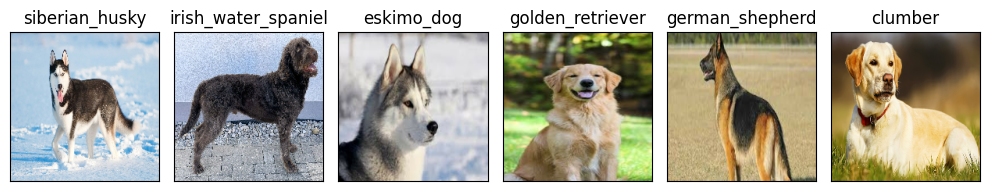

In [ ]:
# check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.tight_layout(h_pad=1.0)
  plt.imshow(image)